<a href="https://colab.research.google.com/github/tai-calg/public_test1/blob/master/%E5%86%99%E7%9C%9F%E5%88%A4%E5%AE%9A%E3%80%80%E6%B8%85%E6%9B%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly&response_type=code

Enter your authorization code:
4/1AY0e-g4gTJwIViuz-p1bYYHGYuLLg5hYBJsXODrs7V6VfvbUik3BsQB_BQQ
Mounted at /content/gdrive


In [2]:
from googleapiclient.discovery import build
from googleapiclient.http import MediaIoBaseDownload 
from google.colab import auth

In [3]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
import os
import numpy as np
import time
import cv2 
import matplotlib.pyplot as plt

In [5]:
DIR = "/content/gdrive/My Drive/Gazou"
CATEGORY = ["2d_character","2d_landscape","3d_view"]
for i in CATEGORY :
  path = os.path.join(DIR,i)
  print(len(os.listdir(path)))

1818
666
1026


###最初に分ける

In [ ]:
#全画像をtrain data とtest dataに分ける
import shutil 
a_1 = os.listdir(DIR + "/" + CATEGORY[0])
a_2 = os.listdir(DIR + "/" + CATEGORY[1])
a_3 = os.listdir(DIR + "/" + CATEGORY[2])
a_1_train = a_1[: len(a_1)*3//4]
a_1_test = a_1[len(a_1)*3//4:]
a_2_train = a_2[: len(a_2)*3//4]
a_2_test = a_2[len(a_2)*3//4:]
a_3_train = a_3[: len(a_3)*3//4]
a_3_test = a_3[len(a_3)*3//4:]
#この辺for とdef 使えばカッコよく書けそうだけどまあいいか

In [ ]:
print(len(a_1_train))

606


In [ ]:
for i in range(len(a_1_train)):
  shutil.move(os.path.join(DIR,CATEGORY[0],a_1_train[i]),"/content/gdrive/My Drive/Gazou/train_data/2d_character")
for i in range(len(a_1_test)):
  shutil.move(os.path.join(DIR,CATEGORY[0],a_1_test[i]),"/content/gdrive/My Drive/Gazou/test_data/2d_character")
for i in range(len(a_2_train)):
  shutil.move(os.path.join(DIR,CATEGORY[1],a_2_train[i]),"/content/gdrive/My Drive/Gazou/train_data/2d_landscape")
for i in range(len(a_2_test)):
  shutil.move(os.path.join(DIR,CATEGORY[1],a_2_test[i]),"/content/gdrive/My Drive/Gazou/test_data/2d_landscape")
for i in range(len(a_3_train)):
  shutil.move(os.path.join(DIR,CATEGORY[2],a_3_train[i]),"/content/gdrive/My Drive/Gazou/train_data/3d_view")
for i in range(len(a_3_test)):
  shutil.move(os.path.join(DIR,CATEGORY[2],a_3_test[i]),"/content/gdrive/My Drive/Gazou/test_data/3d_view")


In [ ]:
TraTes=["train_data","test_data"]
CATEGORY = ["2d_character","2d_landscape","3d_view"]

###先にtrainデータ水増ししとく

In [ ]:
def create_padded_data():
  import os
  import cv2
  import glob
  from scipy import ndimage
  for cate in CATEGORY:
    print("今から{}の写真を水増しします".format(cate))
    in_dir = DIR + "/" + TraTes[0] +"/"+ cate + "/*" #glob用の引数
    hozon_dir = DIR + "/" + cate #ミスしたときのために移動させて空になったディレクトリの方にいれとく
    in_jpg = glob.glob(in_dir) #ディレクトリ内のファイルをlistとして返す
    img_name_list = os.listdir(hozon_dir) 
    for i in range(len(in_jpg)):
      img = cv2.imread(str(in_jpg[i])) #読み込む
      #回転
      for ang in [-15,15]:
        img_rot = ndimage.rotate(img,ang)
        img_rot = cv2.resize(img_rot,(200,200))
        filename = os.path.join(hozon_dir,str(i) +"_"+str(ang)+".jpg")
        cv2.imwrite(str(filename),img_rot)
       
      #ぼかし
      img_filter = cv2.GaussianBlur(img_rot,(7,7),0)
      filename = os.path.join(hozon_dir,str(i)+"_"+"filter.jpg")
      cv2.imwrite(str(filename),img_filter)

  print("画像の水増しに成功しました！")
#def にしたくせに引数使わず一般性ないのでうんち

In [ ]:
create_padded_data()

今から2d_characterの写真を水増しします
今から2d_landscapeの写真を水増しします
今から3d_viewの写真を水増しします
画像の水増しに成功しました！


In [ ]:
#DIR = "/content/gdrive/My Drive/Gazou"
#CATEGORY = ["2d_character","2d_landscape","3d_view"]
#水増しした画像を送る作業
for cate in CATEGORY:
  for i in range(len(os.listdir(DIR + "/" + cate))):
    hozon_dir = DIR + "/" + cate
    img_name_list = os.listdir(hozon_dir) 
    path_Be = os.path.join(hozon_dir,img_name_list[i])
    path_Af = /content/gdrive/My Drive/Gazou/train_data + "/" + cate
    shutil.move(path_Be,path_Af)

###水増し画像と元の画像両方入ってるディレクトリを作る

In [ ]:
import shutil
#水増しした画像をコピーするならこっち
for cate in CATEGORY:
  for i in range(len(os.listdir(DIR + "/" + cate))):
    hozon_dir = DIR + "/" + cate
    img_name_list = os.listdir(hozon_dir) 
    path_Be = os.path.join(hozon_dir,img_name_list[i])
    path_Af = "/content/gdrive/My Drive/Gazou/pad_train_data" + "/" + cate
    shutil.copy(path_Be,path_Af)

In [ ]:
#水増しでない元の画像もpad_train_dataディレクトリにコピー
for cate in CATEGORY:
  print("今から{}の写真をコピーします".format(cate))
  for i in range(len(os.listdir("/content/gdrive/My Drive/Gazou/train_data" + "/" + cate))):
    hozon_dir = "/content/gdrive/My Drive/Gazou/train_data" + "/" + cate
    img_name_list = os.listdir(hozon_dir) 
    path_Be = os.path.join(hozon_dir,img_name_list[i])
    path_Af = "/content/gdrive/My Drive/Gazou/pad_train_data" + "/" + cate
    shutil.copy(path_Be,path_Af)
print("終わりました！")

今から2d_landscapeの写真をコピーします
今から3d_viewの写真をコピーします
終わりました！


###train dataとvalidation dataの分割
(モデル構築の後に行う)

In [6]:
k =4
X_val_data_num = len(X_train)//k
y_val_data_num = len(y_train)//k
validation_score =[]
for fold in range(k):
  X_val = X_train[:X_val_data_num]
y_val = y_train[:y_val_data_num]
X_train = X_train[X_val_data_num:]
y_train = y_train[y_val_data_num:]




NameError: ignored

### kerasによるモデル構築

In [9]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Input, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
import time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
num_class = len(CATEGORY)
img_width , img_height = 200,200
#トレーニング用とバリデーション用の格納先
train_dir = "/content/gdrive/My Drive/Gazou/pad_train_data"
test_dir = "/content/gdrive/My Drive/Gazou/test_data"
#train_dir_pad1 = "/content/gdrive/My Drive/Gazou/2d_character"
#train_dir_pad2= "/content/gdrive/My Drive/Gazou/2d_landscape"
#train_dir_pad3= "/content/gdrive/My Drive/Gazou/3d_view"

In [10]:
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(img_width,img_height),
    color_mode= "rgb",
    classes = CATEGORY,
    class_mode="categorical",
    batch_size=32,
    shuffle = True,
    seed = 1
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width,img_height),
    color_mode= "rgb",
    classes = CATEGORY,
    class_mode="categorical",
    batch_size=32,
    shuffle = True,
    seed = 1
)


Found 4680 images belonging to 3 classes.
Found 391 images belonging to 3 classes.


In [ ]:
#vgg16のロード、FC層は不要なのでinclude_top= False
keras.applications.vgg16.VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
input_tensor = Input(shape=(img_width,img_height,3))
vgg16 = VGG16(include_top=False, weights="imagenet",input_tensor=input_tensor)

#全結合層の作成(ここと重みデータの再学習をさせる層は自作する)
top_model = Sequential()
top_model.add(Flatten(input_shape=vgg16.output_shape[1:]))
top_model.add(Dense(128, activation='relu'))
#この辺変える余地あり（層の追加など）
top_model.add(Dropout(0.5))
top_model.add(Dense(258, activation='relu'))
top_model.add(Dropout(0.2))
top_model.add(Dense(num_class, activation='softmax'))

# VGG16とFC層を結合してモデルを作成
vgg_model = Model(inputs=vgg16.input, outputs=top_model(vgg16.output))

In [ ]:
#一旦モデルの全体像を表示
vgg_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)      

In [ ]:
# input層を含めた15層目までは重みを固定
for i in vgg_model.layers[:15]:
  i.trainable = False


#モデルをコンパイル、多クラス分類を指定
vgg_model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy"])

In [ ]:
#test_dataディレクトリ内に何枚の画像が保存されているか数値を出す（train_dataも同様に）
#(train_dir = "/content/gdrive/My Drive/Gazou/train_data"
#test_dir = "/content/gdrive/My Drive/Gazou/test_data"
#CATEGORY = ["2d_character","2d_landscape","3d_view"])
number_of_img_list=[]
for part in [train_dir, test_dir]:
  number_of_img=[]
  for cate in CATEGORY:
    number_of_img.append(len(os.listdir(part + "/"+ cate)))
  number_of_img_list.append(number_of_img)

print(number_of_img_list)

[[2424, 888, 1368], [202, 75, 114]]


In [ ]:
train_num =np.sum(number_of_img_list[0])
test_num =np.sum(number_of_img_list[1])
print(train_num)
print(test_num)


4680
391


In [ ]:
batch_size = 32
history = vgg_model.fit_generator(
    train_generator,
    steps_per_epoch = train_num // 32,
    epochs=5,
    validation_data=test_generator,
    validation_steps=test_num // 32)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/16
146/146 [==============================] - 2605s 18s/step - loss: 0.9691 - accuracy: 0.5247 - val_loss: 0.8435 - val_accuracy: 0.6510
Epoch 2/16
146/146 [==============================] - 75s 517ms/step - loss: 0.7239 - accuracy: 0.6857 - val_loss: 0.8575 - val_accuracy: 0.5755
Epoch 3/16
146/146 [==============================] - 75s 512ms/step - loss: 0.5925 - accuracy: 0.7302 - val_loss: 0.8693 - val_accuracy: 0.6901
Epoch 4/16
146/146 [==============================] - 75s 513ms/step - loss: 0.4447 - accuracy: 0.8133 - val_loss: 0.9456 - val_accuracy: 0.6823
Epoch 5/16
146/146 [==============================] - 75s 514ms/step - loss: 0.3169 - accuracy: 0.8892 - val_loss: 1.1134 - val_accuracy: 0.7422
Epoch 6/16
146/146 [==============================] - 75s 517ms/step - loss: 0.2243 - accuracy: 0.9251 - val_loss: 2.4262 - val_accuracy: 0.7057
Epoch 7/16
146/146 [==============================] - 

###データの評価を可視化

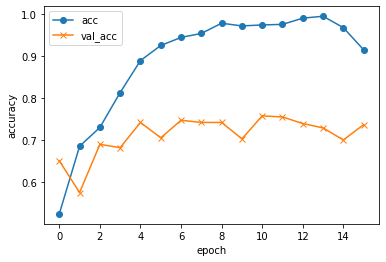

In [ ]:
import matplotlib.pyplot as plt

#acc, val_accのプロット
plt.plot(history.history["accuracy"], label="acc", ls="-", marker="o")
plt.plot(history.history["val_accuracy"], label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
#Final.pngという名前で、結果を保存
plt.savefig('Final.png')
plt.show()

#モデルの重みを保存し使えるようにする

In [ ]:
import os
#resultsディレクトリに保存
result_dir = "/content/gdrive/My Drive/Gazou/result"


# 重みを保存
vgg_model.save_weights(os.path.join(result_dir, 'Final.h5'))


In [ ]:
# 作成したモデルを保存
vgg_model.save('VGGtake1.h5')

In [ ]:
#ローカルに重みをダウンロード
from google.colab import files
files.download(result_dir + "/"+"Final.h5") 

###重みを保存したモデルと同じ構造のモデルを定義(ここから)

In [11]:
import keras
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Input, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

DIR = "/content/gdrive/My Drive/Gazou"
CATEGORY = ["2d_character","2d_landscape","3d_view"]
num_class = len(CATEGORY)
img_width , img_height = 200,200
#トレーニング用とバリデーション用の格納先
train_dir = "/content/gdrive/My Drive/Gazou/pad_train_data"
test_dir = "/content/gdrive/My Drive/Gazou/test_data"

#vgg16のロード、FC層は不要なのでinclude_top= False
keras.applications.vgg16.VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
input_tensor = Input(shape=(img_width,img_height,3))
vgg16 = VGG16(include_top=False, weights="imagenet",input_tensor=input_tensor)

#全結合層の作成(ここと重みデータの再学習をさせる層は自作する)
top_model = Sequential()
top_model.add(Flatten(input_shape=vgg16.output_shape[1:]))
top_model.add(Dense(128, activation='relu'))
#この辺変える余地あり（層の追加など）
top_model.add(Dropout(0.5))
top_model.add(Dense(258, activation='relu'))
top_model.add(Dropout(0.2))
top_model.add(Dense(num_class, activation='softmax'))

# VGG16とFC層を結合してモデルを作成
vgg_model = Model(inputs=vgg16.input, outputs=top_model(vgg16.output))

58892288/58889256 [==============================] - 1s 0us/step


In [12]:
#定義したモデルに重みを読み込ませる
import os
#resultsディレクトリに保存
result_dir = "/content/gdrive/My Drive/Gazou/result"
from keras.models import load_model
vgg_model.load_weights(result_dir + "/"+"Final.h5")

###ローカルでモデルを実行する

In [23]:
# テスト用のコード
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# 画像を読み込んで予測する
def img_predict(filename):
    # 画像を読み込んで4次元テンソルへ変換
    img = image.load_img(filename, target_size=(img_height, img_width))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    # 学習時にImageDataGeneratorのrescaleで正規化したので同じ処理が必要
    # これを忘れると結果がおかしくなるので注意
    x = x / 255.0   
    #表示
    plt.imshow(img)
    plt.show()
    # 指数表記を禁止にする
    np.set_printoptions(suppress=True)

    #画像を予測    
    global pred
    pred = vgg_model.predict(x)[0]
    #結果を表示する
    print(f"2d_character :{round(pred[0]*100,2)}%  , 2d_landscape : {round(pred[1]*100,2)}% ,  3d_view : {round(pred[2]*100,2)}%")
    #print(pred*100,"%  ")
    #print(pred) 

In [24]:
import glob
#テスト用の画像が入っているディレクトリ
test = glob.glob('/content/gdrive/My Drive/Gazou/zissenn_gazou/*')
test_dir = "/content/gdrive/My Drive/Gazou/zissenn_gazou"

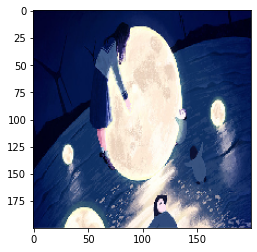

2d_character :91.46%  , 2d_landscape : 0.36% ,  3d_view : 8.18%


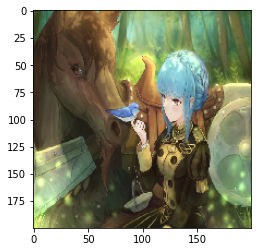

2d_character :99.56%  , 2d_landscape : 0.08% ,  3d_view : 0.37%


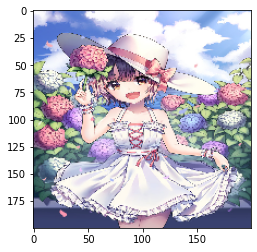

2d_character :100.0%  , 2d_landscape : 0.0% ,  3d_view : 0.0%


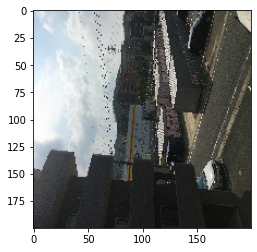

2d_character :0.99%  , 2d_landscape : 6.69% ,  3d_view : 92.32%


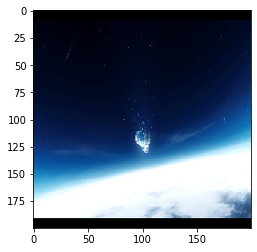

2d_character :0.11%  , 2d_landscape : 99.66% ,  3d_view : 0.23%


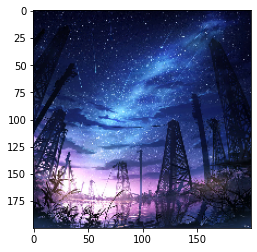

2d_character :0.0%  , 2d_landscape : 100.0% ,  3d_view : 0.0%


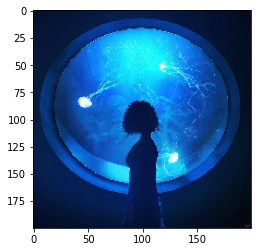

2d_character :1.3%  , 2d_landscape : 98.27% ,  3d_view : 0.43%


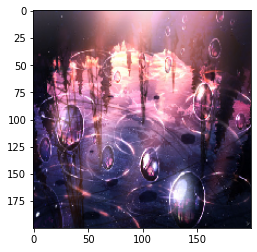

2d_character :0.36%  , 2d_landscape : 99.49% ,  3d_view : 0.15%


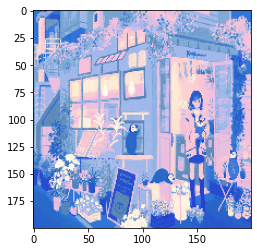

2d_character :4.47%  , 2d_landscape : 94.43% ,  3d_view : 1.1%


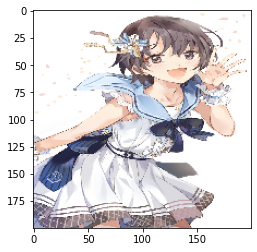

2d_character :100.0%  , 2d_landscape : 0.0% ,  3d_view : 0.0%


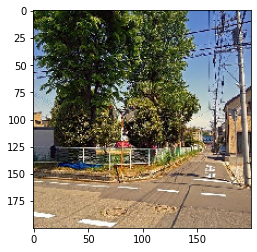

2d_character :4.2%  , 2d_landscape : 37.5% ,  3d_view : 58.3%


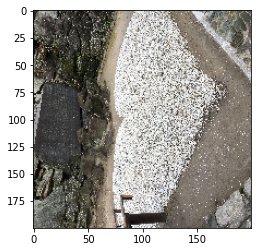

2d_character :0.77%  , 2d_landscape : 1.57% ,  3d_view : 97.66%


IndexError: ignored

In [25]:
for i in range(len(os.listdir(test_dir))):
  img_predict(test[i])